In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250
import matplotlib 
from matplotlib import pylab as plt
import joblib

In [2]:
import os

cwd = os.getcwd()
dirct = os.path.abspath(os.path.join(cwd,os.pardir))

In [919]:
df = pd.read_csv(dirct +'/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exclude Customer ID
df = df.loc[:, df.columns != 'customerID'] 

In [4]:
# number of rows
print(df.shape[0]) 

# number of columns
print(df.shape[1]) 

7043
20


# 1. Exploratory Data Analysis

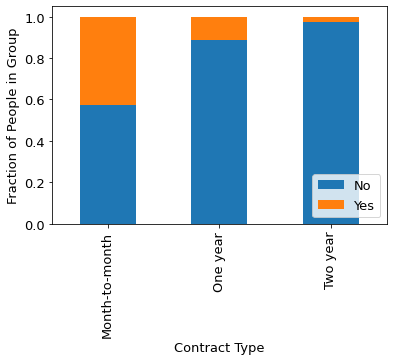

In [921]:
# Churn by Contract Type


count_matrix = df.groupby(['Contract','Churn']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of People in Group')
plt.xlabel('Contract Type')
plt.legend(loc=4)
plt.savefig(dirct +'/figures/ContractType_Churn.png', bbox_inches='tight',dpi=300)
plt.show()

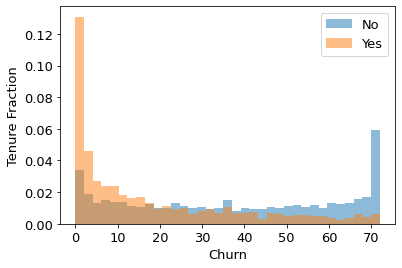

In [924]:
df['tenure'].describe()

categories = df['Churn'].unique()
bin_range = (df['tenure'].min(),df['tenure'].max())

for c in categories:
    plt.hist(df[df['Churn']==c]['tenure'],alpha=0.5,label=c,range=bin_range,bins=35,density=True)
plt.legend()
plt.ylabel('Tenure Fraction')
plt.xlabel('Churn')
plt.savefig(dirct +'/figures/tenure_Churn.png', bbox_inches='tight',dpi=300)
plt.show()

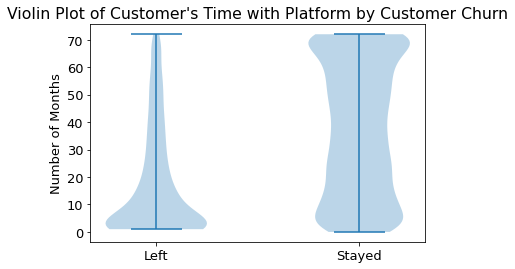

In [925]:
dataset = [df[df['Churn']=='Yes']['tenure'].values,
           df[df['Churn']=='No']['tenure'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Left','Stayed'])
plt.ylabel('Number of Months')
plt.title("Violin Plot of Customer's Time with Platform by Customer Churn")
plt.savefig(dirct +'/figures/Violin_tenure_Churn.png', bbox_inches='tight',dpi=300)
plt.show()

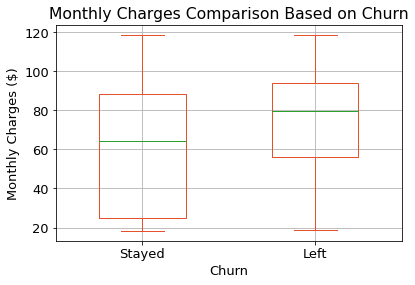

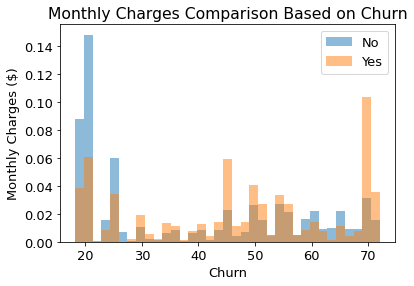

In [929]:
colors = ['#4D3425','#E4512B']

df['MonthlyCharges'].describe()

df[['MonthlyCharges','Churn']].boxplot(by='Churn',widths=(0.5,0.5),
                                       boxprops=dict(color=colors[1]), capprops=dict(color=colors[1]),whiskerprops=dict(color=colors[1]))
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')
plt.xticks([1,2],['Stayed','Left'])
plt.suptitle('') 
plt.title('Monthly Charges Comparison Based on Churn')
plt.savefig(dirct +'/figures/boxplot_MonthlyCharges_Churn.png', bbox_inches='tight',dpi=300)
plt.show()


categories = df['Churn'].unique()
bin_range = (df['MonthlyCharges'].min(),df['tenure'].max())

for c in categories:
    plt.hist(df[df['Churn']==c]['MonthlyCharges'],alpha=0.5,label=c,range=bin_range,bins=35,density=True)
plt.legend()
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')
plt.suptitle('') 
plt.title('Monthly Charges Comparison Based on Churn')
plt.savefig(dirct +'/figures/hstgm_MonthlyCharges_Churn.png', bbox_inches='tight',dpi=300)
plt.show()

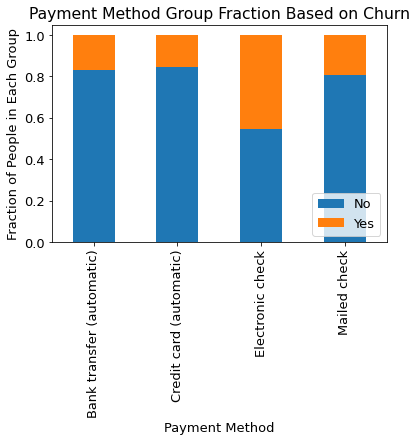

In [930]:
# Churn by Payment Method 

count_matrix = df.groupby(['PaymentMethod','Churn']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of People in Each Group')
plt.xlabel('Payment Method')
plt.title('Payment Method Group Fraction Based on Churn')
plt.legend(loc=4)
plt.savefig(dirct +'/figures/paymentMethod_Churn.png', bbox_inches='tight',dpi=300)
plt.show()

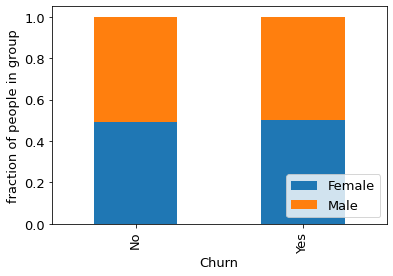

Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64


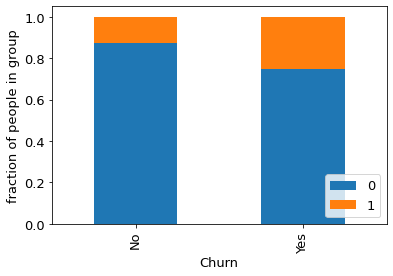

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64


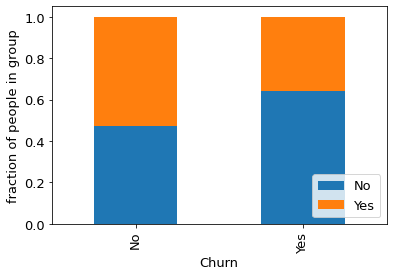

No     3641
Yes    3402
Name: Partner, dtype: int64
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64


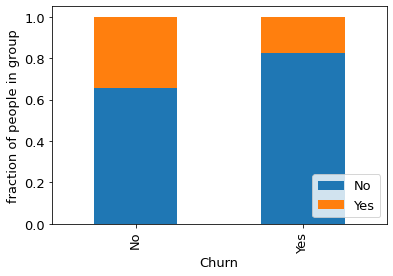

No     4933
Yes    2110
Name: Dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64


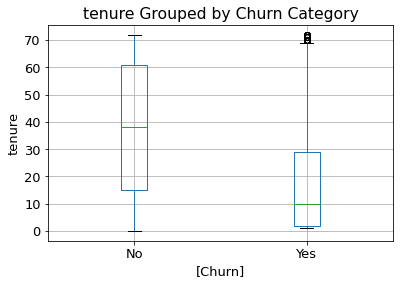

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


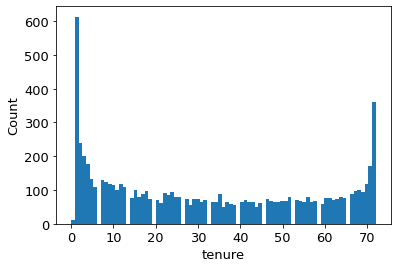

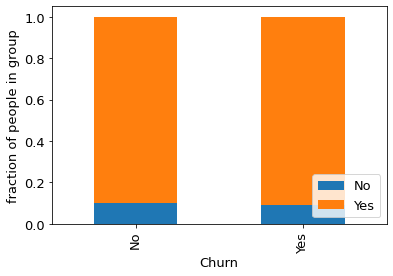

Yes    6361
No      682
Name: PhoneService, dtype: int64
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64


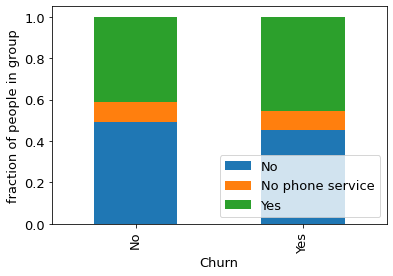

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64


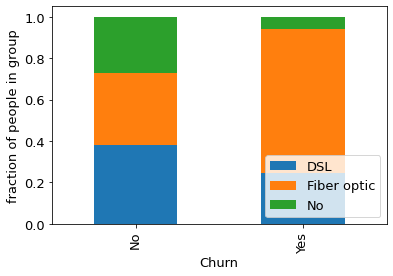

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64


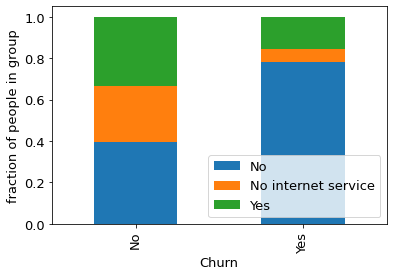

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64


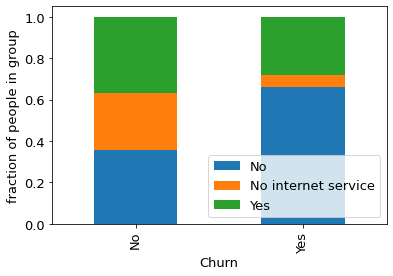

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64


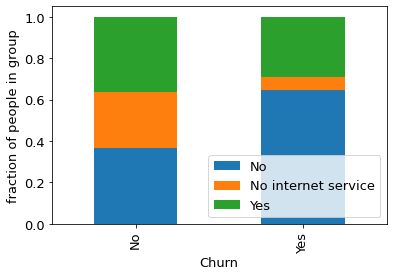

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64


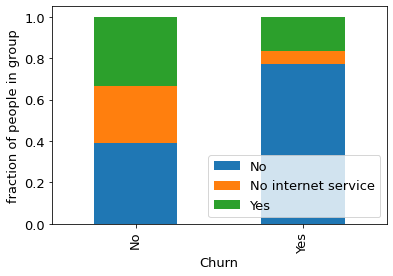

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64


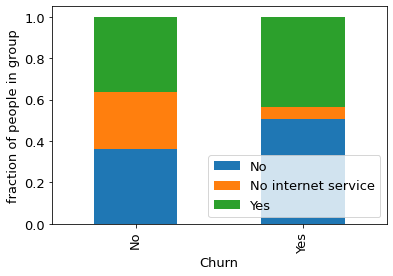

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64


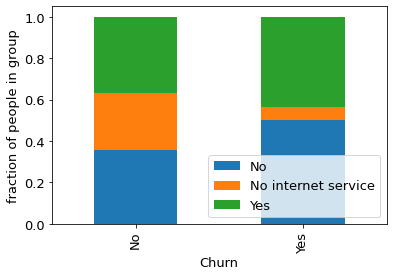

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64


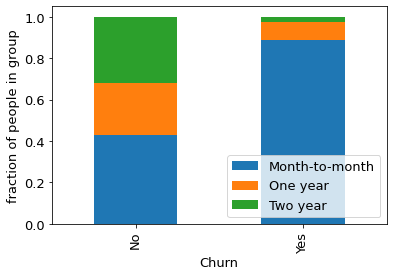

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64


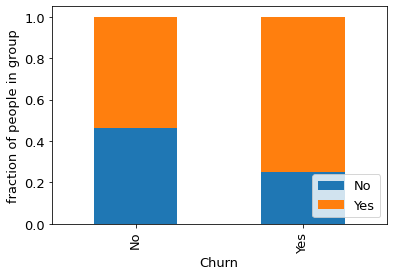

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64


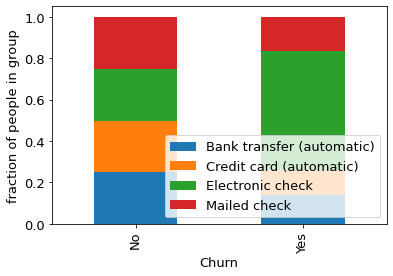

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64


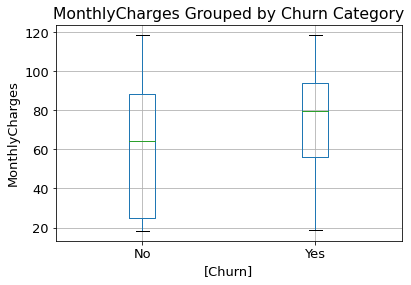

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


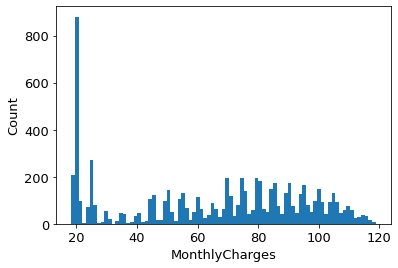

KeyboardInterrupt: 

In [920]:
# If the feature is categorical, make bar graph, and print out values counts in percentage and numbers
# If the feature is continuous/ numerical, make box plot, and print out description 

for col in df.columns: 
    
    # categorical vs. continuous 
    if df[col].dtypes == "float64": 
        df[['Churn',col]].boxplot(by='Churn')
        plt.ylabel(col)
        plt.suptitle('') 
        plt.title(col + ' Grouped by Churn Category')
        plt.show()
        print(df[col].describe())
        df[col].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    
    # categorical vs. categorical 
    elif df[col].dtypes == "object":
        count_matrix = df.groupby(['Churn', col]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction of people in group')
        plt.legend(loc=4)
        plt.show()
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True))
        
    # categorical vs. cateogrical 
    elif (df[col].dtypes == "int64") & (len(df[col].value_counts()) <= 15):
        count_matrix = df.groupby(['Churn', col]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction of people in group')
        plt.legend(loc=4)
        plt.show()
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True))
    
    # cateogrical vs. continuous 
    elif (df[col].dtypes == "int64") & (len(df[col].value_counts()) > 15):
        df[['Churn',col]].boxplot(by='Churn')
        plt.ylabel(col)
        plt.suptitle('') 
        plt.title(col + ' Grouped by Churn Category')
        plt.show()
        print(df[col].describe())
        df[col].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

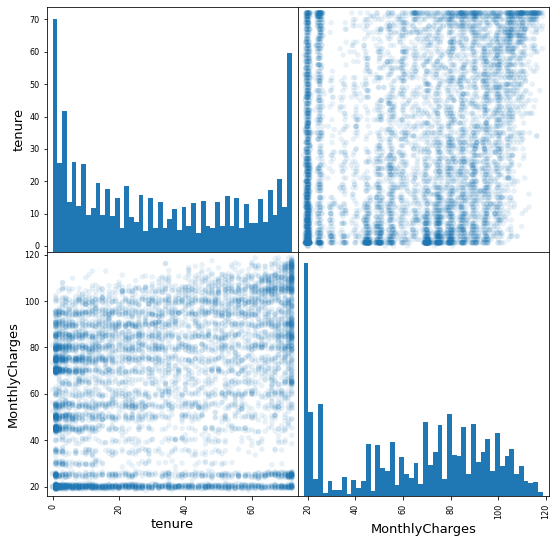

In [931]:
# Only three continuous variables for scatter matrix 

df_continuous = df[['tenure','MonthlyCharges','TotalCharges']]

pd.plotting.scatter_matrix(df_continuous, figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

In [5]:
# Missing Values 

## Change the type of Feature TotalCharges
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
print(df['TotalCharges'].describe())

print(df.isnull().sum())

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# 2. Methods

In [6]:
# Missing Data: delete 7 rows of missing total charges variable 

df_r = df.dropna()
print(df_r.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
print(df_r.shape[0]) 

7032


In [77]:
y = df_r['Churn']
X = df_r.loc[:, df_r.columns != 'Churn']

In [160]:
# Calculate Baseline f1 Score 
# Predict all classes to be 1 

class_0 = df_r['Churn'].value_counts()[0]
class_1 = df_r['Churn'].value_counts()[1]

TN = 0
FP = class_0

print(class_0)

FN = 0
TP = class_1 

print(class_1)

p = TP/(TP+FP) 
r = TP/(TP+FN)

baseline_f1 = (2*p*r)/(p+r)

print("Hand-calculated baseline F1 score: ",baseline_f1) 

5163
1869
Hand-calculated baseline F1 score:  0.41995281429052916


In [159]:
y = df_r['Churn'].map(dict(Yes=1, No=0))
y_baseline =  np.full((7032, 1), 1)

from sklearn.metrics import f1_score
f1_score(y, y_baseline) 

print("sklearn calculated baseline F1 score: ",baseline_f1) 

sklearn calculated baseline F1 score:  0.41995281429052916


In [78]:
y = df_r['Churn'].map(dict(Yes=1, No=0))
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [156]:
y = df_r['Churn'].map(dict(Yes=1, No=0))
y_baseline =  np.full((7032, 1), 1)

from sklearn.metrics import fbeta_score    
fbeta_score(y, y_baseline, beta = 2) 

0.41995281429052916

In [257]:
# y = pd.DataFrame(data=df_r['Churn'])
# X = df_r.loc[:, df_r.columns != 'Churn']
# y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [13]:
y = df_r['Churn'].map(dict(Yes=1, No=0))
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [164]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 

In [163]:
ordinal_ftrs = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',\
               'OnlineBackup','DeviceProtection','TechSupport',\
               'StreamingTV','StreamingMovies','Contract'] 
ordinal_cats = [['No','Yes'],['No phone service','No','Yes'],['No','DSL','Fiber optic'],['No internet service','No','Yes'],\
                ['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],\
               ['No internet service','No','Yes'],['No internet service','No','Yes'],['Month-to-month','One year','Two year']]


cat_ftrs = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PaperlessBilling','PaymentMethod']


num_ftrs = ['tenure','MonthlyCharges','TotalCharges']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [76]:
#  prep = Pipeline(steps=[('preprocessor', preprocessor)])

In [411]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import ParameterGrid

def MLpipe_Stratify_f1(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function stratified-splits the data to training/validation/test (60/20/20)
    The f1 score as metric score 
    '''
    
    nr_states = 10
    test_scores = np.zeros(nr_states)
    val_best_scores = np.zeros(nr_states)
    final_models = []
    feature_importances = np.zeros(nr_states)
    
    for i in range(nr_states):
        
        print('\nrandoms state '+str(i+1))
        
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state=22*i)
        X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,test_size = 0.25, stratify = y_other, random_state=22*i)        

        train_score = np.zeros(len(ParameterGrid(param_grid)))
        val_score = np.zeros(len(ParameterGrid(param_grid)))
        
        X_train_prep = preprocessor.fit_transform(X_train) 
        
#         feature_names = preprocessor.transformers_[0][-1] + \
#                 list(preprocessor.named_transformers_['cat'][0].get_feature_names(cat_ftrs)) + \
#                 preprocessor.transformers_[2][-1]
#         print(feature_names)
        
        X_val_prep = preprocessor.transform(X_val)
        X_test_prep = preprocessor.transform(X_test)
        
        
        models = []
        
        for p in range(len(ParameterGrid(param_grid))):
            params = ParameterGrid(param_grid)[p]
            # print('   ',params) 
            try: 
                ML = ML_algo(random_state = 22*i)
            except: 
                ML = ML_algo()
                
            ML.set_params(**params)
            ML.fit(X_train_prep,y_train)
            
            train_score[p] = f1_score(y_train, ML.predict(X_train_prep)) 
            
            models.append(ML)
            y_CV_pred = ML.predict(X_val_prep)
            val_score[p]= f1_score(y_val, y_CV_pred) 
            
            # print('   ','train score:',train_score[p],'validation score:',val_score[p])
        
        print([np.argmax(val_score)])
        print(models[np.argmax(val_score)])
        val_best_scores[i] = np.max(val_score)
        print('\nbest model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
        print('corresponding validation F1 score:',np.max(val_score))
        
        final_models.append(models[np.argmax(val_score)])
        
        y_test_pred = final_models[-1].predict(X_test_prep)
    
        
        test_scores[i] = f1_score(y_test, y_test_pred)
         
        print('test F1 score:',test_scores[i])
                
    return val_best_scores, test_scores, final_models, X_test_prep, y_test

In [327]:
# Logistic Regression L1 Regularization 

from sklearn.linear_model import LogisticRegression

params = { 'penalty' : ['l1'], 
          'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], 
         'max_iter': [100000],
         'solver': ['saga'] } 

Logl1_val_best_F1, Logl1_test_F1, Logl1_models = MLpipe_Stratify_f1(X, y, prep, LogisticRegression, params)


randoms state 1
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 0.001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 0.01}
    train score: 0.502247191011236 validation score: 0.521172638436482
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 0.1}
    train score: 0.5887016848364717 validation score: 0.5838150289017341
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 1.0}
    train score: 0.6076071256620125 validation score: 0.5889046941678521
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 10.0}
    train score: 0.6062650602409639 validation score: 0.5957446808510639
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 100.0}
    train score: 0.6062650602409639 validation score: 0.594900849858357
    {'solver': 'saga', 'penalty': 'l

    train score: 0.6070565490575157 validation score: 0.5947521865889213
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 10.0}
    train score: 0.6052123552123552 validation score: 0.6037735849056604
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 100.0}
    train score: 0.6061776061776061 validation score: 0.6037735849056604
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 1000.0}
    train score: 0.6064703042008691 validation score: 0.6037735849056604
    {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 10000.0}
    train score: 0.6064703042008691 validation score: 0.6037735849056604
[5]
LogisticRegression(C=10.0, max_iter=100000, penalty='l1', random_state=110,
                   solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100000, 'C': 10.0}
corresponding validation F1 score: 0.6037735849056604
test F1 score: 0.6020260492040521

randoms state 7
    {'solver': 'saga', 'penalty': '

In [868]:
# Saving Logistic L1 Regularization Best Models at 10 Random States 
filename = dirct + '/results/log_l1_best_models.sav'
joblib.dump(Logl1_models, filename)

['/Users/liyuetian1/Documents/GitHub/DATA1030_MidtermProject/results/log_l1_best_models.sav']

In [870]:
# Logistic Regression L2
params = { 'penalty' : ['l2'], 
          'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], 
         'max_iter': [10000],
         'solver': ['saga'] } 

Logl2_val_best_F1, Logl2_test_F1, Logl2_models, X_test, Y_test = MLpipe_Stratify_f1(X, y, preprocessor, LogisticRegression, params)


randoms state 1
[5]
LogisticRegression(C=10.0, max_iter=10000, random_state=0, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 10.0}
corresponding validation F1 score: 0.5957446808510639
test F1 score: 0.6169590643274854

randoms state 2
[5]
LogisticRegression(C=10.0, max_iter=10000, random_state=22, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 10.0}
corresponding validation F1 score: 0.5819793205317577
test F1 score: 0.5889387144992526

randoms state 3
[3]
LogisticRegression(C=0.1, max_iter=10000, random_state=44, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 0.1}
corresponding validation F1 score: 0.5936599423631125
test F1 score: 0.5969230769230769

randoms state 4
[6]
LogisticRegression(C=100.0, max_iter=10000, random_state=66, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 

In [871]:
# Saving Logistic L2 Regularization Best Models at 10 Random States 
filename = dirct + '/results/log_l2_best_models.sav'
joblib.dump(Logl2_models, filename)

['/Users/liyuetian1/Documents/GitHub/DATA1030_MidtermProject/results/log_l2_best_models.sav']

In [323]:
# Logistic Regression Elastic Net 

params = { 'penalty' : ['elasticnet'], 
          'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
         'l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99], 
         'max_iter': [100000],
         'solver': ['saga'] } 

LogEN_val_best_F1, LogEN_test_F1, LogEN_models = MLpipe_Stratify_f1(X, y, preprocessor, LogisticRegression, params)


randoms state 1
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.25, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 0.0001}
    train score: 0.0 validation sco

    train score: 0.6062650602409639 validation score: 0.594900849858357
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 1000.0}
    train score: 0.6062650602409639 validation score: 0.594900849858357
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 1000.0}
    train score: 0.6062650602409639 validation score: 0.594900849858357
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 1000.0}
    train score: 0.6062650602409639 validation score: 0.594900849858357
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 1000.0}
    train score: 0.6062650602409639 validation score: 0.594900849858357
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 10000.0}
    train score: 0.6062650602409639 validation score: 0.594900849858357
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ra

    train score: 0.6084425036390102 validation score: 0.5819793205317577
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 10.0}
    train score: 0.6084425036390102 validation score: 0.5819793205317577
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 10.0}
    train score: 0.6084425036390102 validation score: 0.5819793205317577
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 10.0}
    train score: 0.6084425036390102 validation score: 0.5819793205317577
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 10.0}
    train score: 0.6084425036390102 validation score: 0.5819793205317577
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 100.0}
    train score: 0.6074721009218826 validation score: 0.5819793205317577
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio'

    train score: 0.5829195630585898 validation score: 0.5931232091690544
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 0.1}
    train score: 0.5819631290483308 validation score: 0.5974395448079659
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 0.1}
    train score: 0.5850746268656716 validation score: 0.592274678111588
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 0.1}
    train score: 0.5835411471321695 validation score: 0.599713055954089
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 0.1}
    train score: 0.5832502492522432 validation score: 0.6005747126436781
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 1.0}
    train score: 0.593460224499756 validation score: 0.5919540229885057
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C

    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.25, 'C': 0.001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 0.001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 0.001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 0.001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 0.001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 0.01}
    train score: 0.574083634486319 validation score: 0.5542168674698795
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 

    train score: 0.6097794822627037 validation score: 0.592489568845619
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 10000.0}
    train score: 0.6097794822627037 validation score: 0.592489568845619
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 10000.0}
    train score: 0.6097794822627037 validation score: 0.592489568845619
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 10000.0}
    train score: 0.6097794822627037 validation score: 0.592489568845619
[42]
LogisticRegression(C=100.0, l1_ratio=0.01, max_iter=100000,
                   penalty='elasticnet', random_state=66, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 100.0}
corresponding validation F1 score: 0.592489568845619
test F1 score: 0.5915080527086385

randoms state 5
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_

    train score: 0.6105466860183842 validation score: 0.5852941176470589
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 100.0}
    train score: 0.6102514506769826 validation score: 0.5832106038291606
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 100.0}
    train score: 0.6102514506769826 validation score: 0.5832106038291606
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 100.0}
    train score: 0.6102514506769826 validation score: 0.5832106038291606
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 1000.0}
    train score: 0.6105466860183842 validation score: 0.5852941176470589
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C': 1000.0}
    train score: 0.6105466860183842 validation score: 0.5852941176470589
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_

    train score: 0.6070565490575157 validation score: 0.5976676384839649
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 1.0}
    train score: 0.6073500967117988 validation score: 0.5967976710334788
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 1.0}
    train score: 0.6070565490575157 validation score: 0.5947521865889213
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 1.0}
    train score: 0.6070565490575157 validation score: 0.5947521865889213
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 10.0}
    train score: 0.6048309178743961 validation score: 0.6037735849056604
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C': 10.0}
    train score: 0.6051232479458675 validation score: 0.6037735849056604
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.

    train score: 0.5345572354211662 validation score: 0.506578947368421
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 0.01}
    train score: 0.5289617486338798 validation score: 0.4966887417218543
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 0.01}
    train score: 0.520065970313359 validation score: 0.4983388704318937
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 0.01}
    train score: 0.5146005509641873 validation score: 0.48911222780569524
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 0.1}
    train score: 0.5970588235294118 validation score: 0.592814371257485
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C': 0.1}
    train score: 0.5973516429622364 validation score: 0.592814371257485
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.25

    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.9, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 0.0001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 0.001}
    train score: 0.20109976433621368 validation score: 0.15130023640661938
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C': 0.001}
    train score: 0.0 validation score: 0.0
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio'

    train score: 0.6160583941605839 validation score: 0.5838150289017341
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 1000.0}
    train score: 0.6160583941605839 validation score: 0.5838150289017341
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 10000.0}
    train score: 0.6160583941605839 validation score: 0.5838150289017341
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C': 10000.0}
    train score: 0.6160583941605839 validation score: 0.5838150289017341
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.25, 'C': 10000.0}
    train score: 0.6160583941605839 validation score: 0.5838150289017341
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 10000.0}
    train score: 0.6160583941605839 validation score: 0.5838150289017341
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 10000

    train score: 0.6004842615012106 validation score: 0.6075581395348837
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 10.0}
    train score: 0.6004842615012106 validation score: 0.6075581395348837
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 100.0}
    train score: 0.5999032414126754 validation score: 0.6055312954876273
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C': 100.0}
    train score: 0.5999032414126754 validation score: 0.6055312954876273
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.25, 'C': 100.0}
    train score: 0.5999032414126754 validation score: 0.6055312954876273
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 100.0}
    train score: 0.6005802707930368 validation score: 0.6055312954876273
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_rat

    train score: 0.5952615992102666 validation score: 0.5731166912850812
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.99, 'C': 0.1}
    train score: 0.5951557093425606 validation score: 0.5718518518518518
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.01, 'C': 1.0}
    train score: 0.6092843326885881 validation score: 0.5820256776034237
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.1, 'C': 1.0}
    train score: 0.6095791001451378 validation score: 0.5820256776034237
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.25, 'C': 1.0}
    train score: 0.6095791001451378 validation score: 0.5820256776034237
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.5, 'C': 1.0}
    train score: 0.6101694915254238 validation score: 0.5820256776034237
    {'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 100000, 'l1_ratio': 0.75

In [872]:
# Saving Logistic Elastic Net Best Models at 10 Random States 
filename = dirct + '/results/log_EN_best_models.sav'
joblib.dump(LogEN_models, filename)

['/Users/liyuetian1/Documents/GitHub/DATA1030_MidtermProject/results/log_EN_best_models.sav']

In [342]:
# SVC
from sklearn.svm import SVC

params = {
    'gamma' : [1e-2, 1e-1, 1e0, 1e1, 1e2, 'auto', 'scale'],
    'C': [0.01, 0.1, 0.5, 1, 5, 10, 20]
}

SVC_val_best_F1, SVC_test_F1, SVC_models = MLpipe_Stratify_f1(X, y, preprocessor, SVC, params)


randoms state 1
[20]
SVC(C=0.5, random_state=0)

best model parameters: {'gamma': 'scale', 'C': 0.5}
corresponding validation F1 score: 0.5861027190332326
test F1 score: 0.5834633385335413

randoms state 2
[34]
SVC(C=5, random_state=22)

best model parameters: {'gamma': 'scale', 'C': 5}
corresponding validation F1 score: 0.554858934169279
test F1 score: 0.5578446909667196

randoms state 3
[34]
SVC(C=5, random_state=44)

best model parameters: {'gamma': 'scale', 'C': 5}
corresponding validation F1 score: 0.5892857142857142
test F1 score: 0.5795275590551182

randoms state 4
[35]
SVC(C=10, gamma=0.01, random_state=66)

best model parameters: {'gamma': 0.01, 'C': 10}
corresponding validation F1 score: 0.5710059171597633
test F1 score: 0.5628930817610063

randoms state 5
[29]
SVC(C=5, gamma=0.1, random_state=88)

best model parameters: {'gamma': 0.1, 'C': 5}
corresponding validation F1 score: 0.5910447761194031
test F1 score: 0.573082489146165

randoms state 6
[34]
SVC(C=5, random_state=11

In [873]:
# Saving SVC Best Models at 10 Random States

filename = dirct + '/results/SVC_best_models.sav'
joblib.dump(SVC_models, filename)

['/Users/liyuetian1/Documents/GitHub/DATA1030_MidtermProject/results/SVC_best_models.sav']

In [340]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier

params = { 
    'n_neighbors': [1, 2, 3, 5, 10, 30, 50, 100, 200],
    'weights': ['uniform', 'distance']
         }

KNN_val_best_F1, KNN_test_F1, KNN_models = MLpipe_Stratify_f1(X, y, preprocessor, KNeighborsClassifier, params)


randoms state 1
[17]
KNeighborsClassifier(n_neighbors=200, weights='distance')

best model parameters: {'weights': 'distance', 'n_neighbors': 200}
corresponding validation F1 score: 0.5888594164456235
test F1 score: 0.5897079276773296

randoms state 2
[10]
KNeighborsClassifier(n_neighbors=30)

best model parameters: {'weights': 'uniform', 'n_neighbors': 30}
corresponding validation F1 score: 0.568888888888889
test F1 score: 0.5901162790697674

randoms state 3
[17]
KNeighborsClassifier(n_neighbors=200, weights='distance')

best model parameters: {'weights': 'distance', 'n_neighbors': 200}
corresponding validation F1 score: 0.5875862068965517
test F1 score: 0.6092124814264487

randoms state 4
[12]
KNeighborsClassifier(n_neighbors=50)

best model parameters: {'weights': 'uniform', 'n_neighbors': 50}
corresponding validation F1 score: 0.5969738651994497
test F1 score: 0.5760233918128655

randoms state 5
[12]
KNeighborsClassifier(n_neighbors=50)

best model parameters: {'weights': 'uniform

In [874]:
# Saving KNN Best Models at 10 Random States

filename = dirct + '/results/KNN_best_models.sav'
joblib.dump(KNN_models, filename)

['/Users/liyuetian1/Documents/GitHub/DATA1030_MidtermProject/results/KNN_best_models.sav']

In [341]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

params = { 'max_features': [1, 3, 5, 10, 20, None],
         'max_depth':  [1, 3, 5, 7, 10, 15, 20, None]} 
        # 'min_samples_split': [ 2, 5, 10, 15, 25, 30] }

RF_val_best_F1, RF_test_F1, RF_models = MLpipe_Stratify_f1(X, y, preprocessor, RandomForestClassifier, params)


randoms state 1
[138]
RandomForestClassifier(max_depth=7, max_features=None, random_state=0)

best model parameters: {'min_samples_split': 2, 'max_features': None, 'max_depth': 7}
corresponding validation F1 score: 0.596045197740113
test F1 score: 0.5964391691394659

randoms state 2
[192]
RandomForestClassifier(max_depth=15, max_features=5, random_state=22)

best model parameters: {'min_samples_split': 2, 'max_features': 5, 'max_depth': 15}
corresponding validation F1 score: 0.5792507204610953
test F1 score: 0.5814307458143075

randoms state 3
[121]
RandomForestClassifier(max_depth=7, max_features=5, min_samples_split=5,
                       random_state=44)

best model parameters: {'min_samples_split': 5, 'max_features': 5, 'max_depth': 7}
corresponding validation F1 score: 0.5852187028657617
test F1 score: 0.577922077922078

randoms state 4
[132]
RandomForestClassifier(max_depth=7, max_features=20, random_state=66)

best model parameters: {'min_samples_split': 2, 'max_features': 2

In [875]:
# Saving RF Best Models at 10 Random States

filename = dirct + '/results/RF_best_models.sav'
joblib.dump(RF_models, filename)

['/Users/liyuetian1/Documents/GitHub/DATA1030_MidtermProject/results/RF_best_models.sav']

In [359]:
# Xgboost  
from sklearn.model_selection import ParameterGrid
import xgboost

param_grid = {
      "learning_rate": [0.05, 0.1, 0.2, 0.3],
      "n_estimators": [1000],
      "seed": [0],
      "gamma": [0, 0.1, 0.2, 0.3, 0.4],
      "colsample_bytree": [0.3, 0.4, 0.5, 0.7],              
      "subsample": [0.4, 0.5, 0.65, 0.75, 1], 
      "min_child_weight": [1, 3, 5, 7],
      "eval_metric": ['logloss'] 
       }

nr_states = 10

XBG_test_scores = np.zeros(nr_states)
XGB_val_best_scores = np.zeros(nr_states)
XGB_final_models = []
XGB_feature_importances = np.zeros(nr_states)
  
for i in range(nr_states):
    
    models = [] 
    
    print('\nrandoms state '+str(i+1))
    
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state=22*i)
    X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,test_size = 0.25, stratify = y_other, random_state=22*i)        
    
    ## Preprocess 
    X_train_prep = preprocessor.fit_transform(X_train) 
    X_val_prep = preprocessor.transform(X_val)
    X_test_prep = preprocessor.transform(X_test)
    
    XGB_feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][0].get_feature_names(cat_ftrs)) + \
                preprocessor.transformers_[2][-1]
    
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    
    ## Loop through parameters
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        XGB = xgboost.XGBClassifier(use_label_encoder =False, random_state = 22*i)
        XGB.set_params(**params)
        XGB.fit(X_train_prep,y_train,early_stopping_rounds=50, eval_set=[(X_val_prep, y_val)], verbose=False)
                
        models.append(XGB) # save it
        y_val_pred = XGB.predict(X_val_prep)
        
        val_score[p] = f1_score(y_val, y_val_pred) 
    
    XGB_val_best_scores = np.max(val_score)
    
    print('\nbest model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
        
    XGB_final_models.append(models[np.argmax(val_score)])

    y_test_pred = XGB_final_models[-1].predict(X_test_prep)
       
    # calculate and save the test score
    XBG_test_scores[i] = f1_score(y_test, y_test_pred)
        
    print('test f1 score:', XBG_test_scores[i])
        


randoms state 1

best model parameters: {'subsample': 0.4, 'seed': 0, 'n_estimators': 1000, 'min_child_weight': 1, 'learning_rate': 0.2, 'gamma': 0.2, 'eval_metric': 'logloss', 'colsample_bytree': 0.5}
corresponding validation score: 0.6031294452347084
test f1 score: 0.5882352941176471

randoms state 2

best model parameters: {'subsample': 0.5, 'seed': 0, 'n_estimators': 1000, 'min_child_weight': 7, 'learning_rate': 0.3, 'gamma': 0.3, 'eval_metric': 'logloss', 'colsample_bytree': 0.3}
corresponding validation score: 0.5937031484257871
test f1 score: 0.5727554179566563

randoms state 3

best model parameters: {'subsample': 0.4, 'seed': 0, 'n_estimators': 1000, 'min_child_weight': 5, 'learning_rate': 0.2, 'gamma': 0.3, 'eval_metric': 'logloss', 'colsample_bytree': 0.3}
corresponding validation score: 0.6023391812865497
test f1 score: 0.5750000000000001

randoms state 4

best model parameters: {'subsample': 0.65, 'seed': 0, 'n_estimators': 1000, 'min_child_weight': 3, 'learning_rate': 0.

In [877]:
# Saving RF Best Models at 10 Random States

filename = dirct + '/results/XGBoost_best_models.sav'
joblib.dump(XGB_final_models, filename)

['/Users/liyuetian1/Documents/GitHub/DATA1030_MidtermProject/results/XGBoost_best_models.sav']

# 3. Results

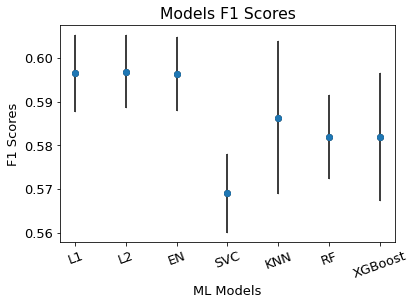

In [884]:
# Models F1 Scores Summary 

rand_states = np.arange(1,11,1) 

column_names = ['L1','L2','EN','SVC', 'KNN','RF','XGBoost']

models_F1 = pd.DataFrame([Logl1_test_F1, Logl2_test_F1, LogEN_test_F1, SVC_test_F1, KNN_test_F1, RF_test_F1, XBG_test_scores], index=column_names, columns = rand_states)

models_F1 = models_F1.T

models_F1


mean_F1 = models_F1.mean(axis=0)
std_F1 = models_F1.std(axis=0)


plt.figure()
plt.rcParams.update({'font.size': 13})
plt.plot(column_names, mean_F1 , 'o', color= 'k')
plt.errorbar(column_names, mean_F1, yerr= std_F1, fmt='o', capsize= 0.5, capthick= 0.2, ecolor='k')
    
plt.ylabel('F1 Scores')
plt.xlabel('ML Models')
plt.title('Models F1 Scores')
plt.xticks(rotation=20)
plt.savefig(dirct +'/figures/Models_F1_Scores.png',dpi=300)
plt.show()

In [364]:
mean_F1 = models_F1.mean(axis=0)
print(mean_F1)

Lasso      0.596412
Ridge      0.596825
EN         0.596300
SVC        0.569109
KNN        0.586327
RF         0.581850
XGBoost    0.581867
dtype: float64

In [879]:
print(std_F1)

Lasso      0.008797
Ridge      0.008388
EN         0.008544
SVC        0.008995
KNN        0.017413
RF         0.009567
XGBoost    0.014656
dtype: float64


#### Decide on Logistic L2 Regularization Model 


# 4. Model Interpretation

In [474]:
# Pipeline for Logistic Regression L2 Regularization Only 

In [885]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import ParameterGrid

def Logl2_Stratify_f1(X, y, preprocessor, ML_algo, param_grid, verbose = 1):
    '''
    This function intends to focus on analyzing and interpretating the final model 
    Logistic Regression L2 Regularization; 
    - Same random states, parameters as previous one
    - Additional outputs for feature importance calculation
    '''
    
    nr_states = 10
    test_scores = np.zeros(nr_states)
    val_best_scores = np.zeros(nr_states)
    final_models = []
    feature_importances = np.zeros(nr_states)
    X_test_all = [] 
    Y_test_all = [] 
    
    
    for i in range(nr_states):
        
        print('\nrandoms state '+str(i+1))
        
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state=22*i)
        X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,test_size = 0.25, stratify = y_other, random_state=22*i)        

        train_score = np.zeros(len(ParameterGrid(param_grid)))
        val_score = np.zeros(len(ParameterGrid(param_grid)))
              
        X_train_prep = preprocessor.fit_transform(X_train) 
        
        feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][0].get_feature_names(cat_ftrs)) + \
                preprocessor.transformers_[2][-1]
        
        X_val_prep = preprocessor.transform(X_val)
        X_test_prep = preprocessor.transform(X_test)
        
        
        if verbose ==2 :
            final_scaler = StandardScaler()
            X_train_prep = final_scaler.fit_transform(X_train_prep)
            X_val_prep = final_scaler.transform(X_val_prep)
            X_test_prep = final_scaler.transform(X_test_prep)
            print('Mean Standardized All Features')
            
        
        X_test_all.append(X_test_prep) 
        Y_test_all.append(y_test)
        
        models = []
        
        for p in range(len(ParameterGrid(param_grid))):
            params = ParameterGrid(param_grid)[p]
            try: 
                ML = ML_algo(random_state = 22*i)
            except: 
                ML = ML_algo()
                
            ML.set_params(**params)
            ML.fit(X_train_prep,y_train)
            
            train_score[p] = f1_score(y_train, ML.predict(X_train_prep)) 
            
            models.append(ML)
            y_CV_pred = ML.predict(X_val_prep)
            val_score[p]= f1_score(y_val, y_CV_pred) 

        print([np.argmax(val_score)])
        print(models[np.argmax(val_score)])
        val_best_scores[i] = np.max(val_score)
        print('\nbest model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
        print('corresponding validation F1 score:',np.max(val_score))
        
        final_models.append(models[np.argmax(val_score)])
        
        y_test_pred = final_models[-1].predict(X_test_prep)
    
        
        test_scores[i] = f1_score(y_test, y_test_pred)
         
        print('test F1 score:',test_scores[i])
                
    return val_best_scores, test_scores, final_models, X_test_all, Y_test_all, feature_names

In [890]:
# Logistic Regression l2
## Verbose = 1, no final mean standardization

params = { 'penalty' : ['l2'], 
          'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], 
         'max_iter': [10000],
         'solver': ['saga'] } 

Logl2_val_best_F1, Logl2_test_F1_v1, Logl2_models_v1, all_X_test_v1, all_Y_test_v1, feature_names = Logl2_Stratify_f1(X, y, preprocessor, LogisticRegression, params, 1)


randoms state 1
[5]
LogisticRegression(C=10.0, max_iter=10000, random_state=0, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 10.0}
corresponding validation F1 score: 0.5957446808510639
test F1 score: 0.6169590643274854

randoms state 2
[5]
LogisticRegression(C=10.0, max_iter=10000, random_state=22, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 10.0}
corresponding validation F1 score: 0.5819793205317577
test F1 score: 0.5889387144992526

randoms state 3
[3]
LogisticRegression(C=0.1, max_iter=10000, random_state=44, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 0.1}
corresponding validation F1 score: 0.5936599423631125
test F1 score: 0.5969230769230769

randoms state 4
[6]
LogisticRegression(C=100.0, max_iter=10000, random_state=66, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 

### 4.1 Global Feature Importance 

#### 4.1.1 Permutation Feature Importance 

shuffling tenure
   shuffled test score: 0.359 +/- 0.012
shuffling MonthlyCharges
   shuffled test score: 0.588 +/- 0.008
shuffling TotalCharges
   shuffled test score: 0.59 +/- 0.014
shuffling gender_Female
   shuffled test score: 0.601 +/- 0.005
shuffling gender_Male
   shuffled test score: 0.597 +/- 0.004
shuffling SeniorCitizen_0
   shuffled test score: 0.581 +/- 0.004
shuffling SeniorCitizen_1
   shuffled test score: 0.603 +/- 0.003
shuffling Partner_No
   shuffled test score: 0.601 +/- 0.006
shuffling Partner_Yes
   shuffled test score: 0.595 +/- 0.004
shuffling Dependents_No
   shuffled test score: 0.604 +/- 0.004
shuffling Dependents_Yes
   shuffled test score: 0.594 +/- 0.004
shuffling PaperlessBilling_No
   shuffled test score: 0.592 +/- 0.005
shuffling PaperlessBilling_Yes
   shuffled test score: 0.599 +/- 0.002
shuffling PaymentMethod_Bank transfer (automatic)
   shuffled test score: 0.6 +/- 0.003
shuffling PaymentMethod_Credit card (automatic)
   shuffled test score: 0.602

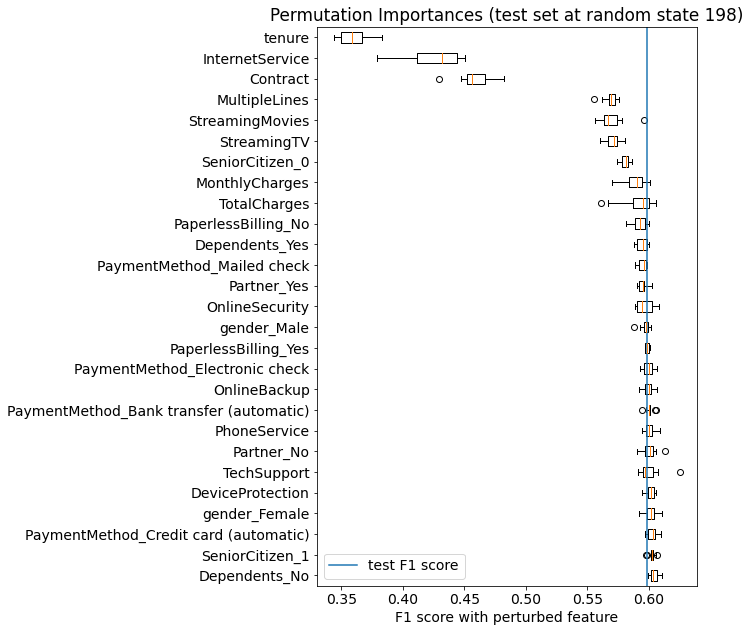

In [891]:
# Choose the Last Model from 10 Random States, C = 10.0


model = Logl2_models_v1[-1]

X_test_df = pd.DataFrame(data=all_X_test_v1[-1], columns=feature_names) 
Y_test = all_Y_test_v1[-1]


np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(feature_names),nr_runs])

for i in range(len(feature_names)):
    print('shuffling '+str(feature_names[i]))
    f1_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test_df.copy()
        X_test_shuffled[feature_names[i]] = np.random.permutation(X_test_df[feature_names[i]].values)
        perm_Y_test_pred = model.predict(X_test_shuffled)
        
        f1_scores.append(f1_score(Y_test,perm_Y_test_pred))
    print('   shuffled test score:',np.around(np.mean(f1_scores),3),'+/-',np.around(np.std(f1_scores),3))
    scores[i] = f1_scores

sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,9))

label_ft = [feature_names[i] for i in sorted_indcs]

plt.boxplot(scores[sorted_indcs].T, labels= label_ft , vert=False)
plt.axvline(Logl2_test_F1_v1[-1],label='test F1 score')
plt.title("Permutation Importances (test set at random state 198)")
plt.xlabel('F1 score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig(dirct +'/figures/PermutationImportances_LogL2.png',dpi=300)
plt.show()

### 4.1.2 Coefficients 

In [777]:
# Verbose = 2, mean standardize all features to calculate scaled coefficients

params = { 'penalty' : ['l2'], 
          'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], 
         'max_iter': [10000],
         'solver': ['saga'] } 

Logl2_val_best_F1, Logl2_test_F1, Logl2_models_v2, all_X_test_v2, all_Y_test_v2, feature_names = Logl2_Stratify_f1(X, y, preprocessor, LogisticRegression, params, 2)


randoms state 1
Mean Standardized All Features
[4]
LogisticRegression(max_iter=10000, random_state=0, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 1.0}
corresponding validation F1 score: 0.5968882602545968
test F1 score: 0.6218978102189782

randoms state 2
Mean Standardized All Features
[5]
LogisticRegression(C=10.0, max_iter=10000, random_state=22, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 10.0}
corresponding validation F1 score: 0.5819793205317577
test F1 score: 0.5880597014925374

randoms state 3
Mean Standardized All Features
[5]
LogisticRegression(C=10.0, max_iter=10000, random_state=44, solver='saga')

best model parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 10000, 'C': 10.0}
corresponding validation F1 score: 0.5894134477825466
test F1 score: 0.6079027355623101

randoms state 4
Mean Standardized All Features
[3]
LogisticRegression(C=0.1, max_iter=10000, r

In [778]:
df = pd.DataFrame(columns=feature_names)

for i in range(len(Logl2_models_v2)): 
    coeffs = Logl2_models_v2[i].coef_
    coeffs = coeffs.flatten()
    df.loc[len(df)] = coeffs
    
df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,-1.455692,-0.485221,0.717505,0.006505,-0.006505,-0.038321,0.038321,0.010419,-0.010419,0.014601,...,-0.119622,0.139245,0.832630,-0.184672,-0.132269,0.074815,-0.263076,0.296624,0.254979,-0.605205
1,-1.413223,-0.448889,0.653662,0.016476,-0.016476,-0.037852,0.037852,0.005839,-0.005839,0.028027,...,-0.179400,0.245220,0.866304,-0.248488,-0.104634,0.056365,-0.220938,0.281135,0.273190,-0.602587
2,-1.287476,-0.196579,0.572477,0.007304,-0.007304,-0.025366,0.025366,-0.013296,0.013296,0.052123,...,-0.304697,0.213082,0.729479,-0.260861,-0.057228,0.043276,-0.277963,0.226318,0.245375,-0.576734
3,-1.109718,0.028232,0.300720,0.005105,-0.005105,-0.055956,0.055956,-0.023226,0.023226,0.065793,...,-0.333867,0.169113,0.744774,-0.311952,-0.082721,-0.044520,-0.135700,0.230002,0.131058,-0.552380
4,-1.400814,-0.508331,0.628667,-0.001046,0.001046,-0.033812,0.033812,0.002221,-0.002221,0.037855,...,-0.208066,0.264237,0.952716,-0.209141,-0.048219,0.019298,-0.222804,0.276559,0.214199,-0.585439
5,-1.722746,-0.592581,0.993347,-0.016378,0.016378,-0.044401,0.044401,-0.004297,0.004297,0.014468,...,-0.180441,0.195462,0.969734,-0.239209,-0.039704,-0.030931,-0.208715,0.261747,0.260644,-0.594631
6,-1.446682,-0.483506,0.734251,0.010144,-0.010144,-0.048017,0.048017,0.028825,-0.028825,0.002484,...,-0.154598,0.182867,0.937884,-0.278372,-0.069856,-0.049884,-0.193395,0.301565,0.281122,-0.568038
7,-1.624607,-0.151269,0.813818,0.001865,-0.001865,-0.035895,0.035895,-0.003849,0.003849,0.037616,...,-0.237823,0.140958,0.730981,-0.250504,-0.109290,-0.038859,-0.143211,0.222316,0.220335,-0.539228
8,-1.352395,-0.481333,0.577631,0.015167,-0.015167,-0.041493,0.041493,0.003832,-0.003832,0.051598,...,-0.187144,0.223166,0.864561,-0.164183,-0.103697,0.078021,-0.273035,0.300060,0.253790,-0.547004
9,-1.410448,-0.540946,0.654020,-0.012774,0.012774,-0.023258,0.023258,0.016375,-0.016375,0.044045,...,-0.249395,0.263084,0.978672,-0.189443,-0.043081,-0.044265,-0.197872,0.268159,0.271240,-0.617027


In [779]:
cof_mean = df.mean(axis = 0)
cof_std = df.std(axis = 0)

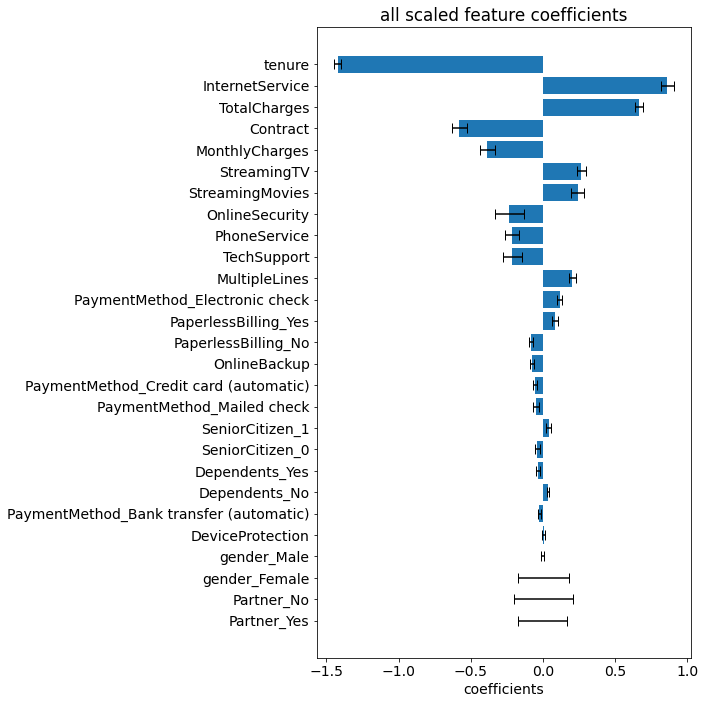

In [780]:

sorted_indcs = np.argsort(np.abs(cof_mean))

FN_coef = [feature_names[i] for i in sorted_indcs[-27:]]
FN_coef

plt.figure(figsize=(10,10))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(27),cof_mean[sorted_indcs[-27:]], xerr = cof_std,  align='center', alpha=1.0, ecolor='black', capsize=5)
plt.yticks(np.arange(27),FN_coef)
plt.xlabel('coefficients')
plt.title('all scaled feature coefficients')
plt.tight_layout()
plt.savefig(dirct +'/figures/LR_coefs_scaled.png',dpi=300)
plt.show()

#### 4.1.3 Using SHAP to calcualte global feature importance 

In [893]:
import shap
shap.initjs()

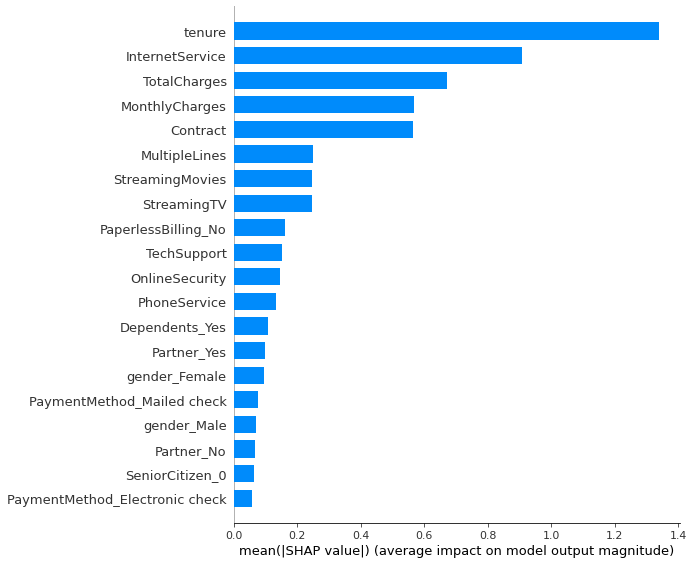

In [905]:
# Use the 10th model at random state 22*9 to calculate shap values 

y_test = all_Y_test_v1[-1]
x_test = pd.DataFrame(all_X_test_v1[-1],columns = feature_names)
model = Logl2_models_v1[-1]

# Calculate Shap values for linear model
masker = shap.maskers.Independent(data=x_test, max_samples=1000)
explainer = shap.Explainer(model, masker=masker, feature_names= feature_names, algorithm="linear")
shap_values = explainer.shap_values(x_test)

# Global Feature Importance based on Shap Values 


shap.summary_plot(shap_values, x_test, plot_type="bar" ,feature_names= feature_names, show=False)
plt.rcParams.update({'font.size': 13})
plt.savefig(dirct +'/figures/Shap_Global_Feature_Importance.png',dpi=300)

### 4.2 Local Feature Importance  

In [571]:
# Taking the last model and text data set to look into local feature importance using Shap 

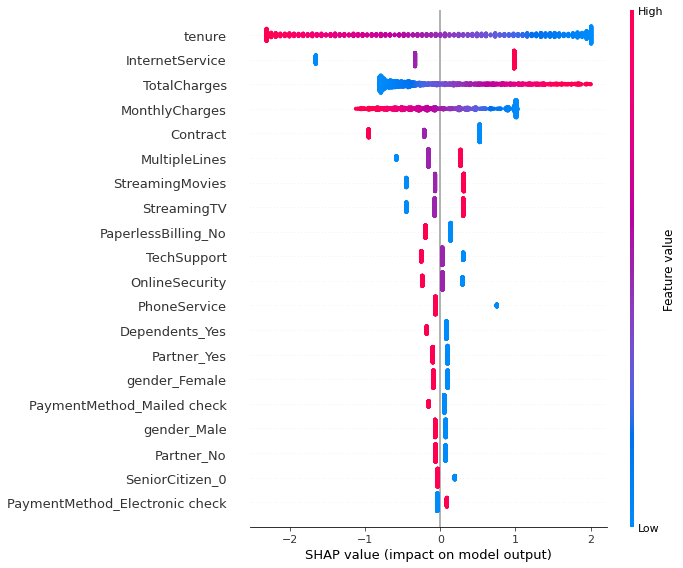

In [794]:
shap.summary_plot(shap_values, x_test)

This figure combines the feature importance and its coefficient values. Features are ordered based on their importances. For example, higher total charges make customers more likely to leave. 

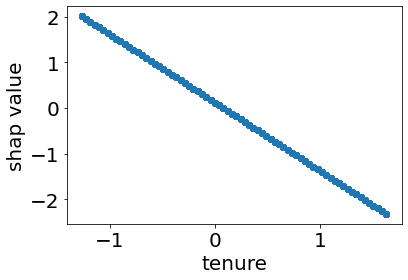

In [854]:
# Individual Feature: tenure 
 
X_test_transformed = pd.DataFrame(x_test,columns = feature_names)
x_plot = X_test_transformed['tenure']

indx = feature_names.index('tenure')
indx

y_plot = shap_values[:,indx]
y_plot

matplotlib.rcParams.update({'font.size': 20})
plt.scatter(X_test_transformed['tenure'],shap_values[:,indx])
plt.ylabel('shap value')
plt.xlabel('tenure')
plt.show()

#### 4.3.1 Local Feature Importance for Individual Datapoint

tenure                                    -1.181415
MonthlyCharges                             0.490783
TotalCharges                              -0.912418
gender_Female                              1.000000
gender_Male                                0.000000
SeniorCitizen_0                            0.000000
SeniorCitizen_1                            1.000000
Partner_No                                 1.000000
Partner_Yes                                0.000000
Dependents_No                              1.000000
Dependents_Yes                             0.000000
PaperlessBilling_No                        0.000000
PaperlessBilling_Yes                       1.000000
PaymentMethod_Bank transfer (automatic)    0.000000
PaymentMethod_Credit card (automatic)      0.000000
PaymentMethod_Electronic check             1.000000
PaymentMethod_Mailed check                 0.000000
PhoneService                               1.000000
MultipleLines                              2.000000
InternetServ

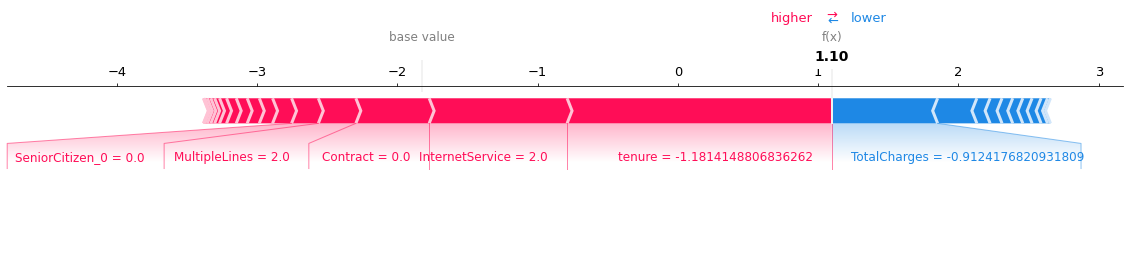

In [915]:
## Looking at Costumer No.7 

y_pred = model.predict(x_test)

print(x_test.iloc[7])
print(shap_values[7,:])
print('Predicted y:', y_pred[7])
print('True y: ', y_test.iloc[7])


shap.force_plot(explainer.expected_value,shap_values[7,:],X_test_transformed.iloc[7],show = False, matplotlib = True, figsize=(20,3))
plt.savefig(dirct +'/figures/Feature_Contribution_Customer7.png',dpi=300,bbox_inches = 'tight')

tenure                                    -1.222207
MonthlyCharges                             1.034613
TotalCharges                              -0.929265
gender_Female                              0.000000
gender_Male                                1.000000
SeniorCitizen_0                            1.000000
SeniorCitizen_1                            0.000000
Partner_No                                 1.000000
Partner_Yes                                0.000000
Dependents_No                              1.000000
Dependents_Yes                             0.000000
PaperlessBilling_No                        1.000000
PaperlessBilling_Yes                       0.000000
PaymentMethod_Bank transfer (automatic)    0.000000
PaymentMethod_Credit card (automatic)      0.000000
PaymentMethod_Electronic check             1.000000
PaymentMethod_Mailed check                 0.000000
PhoneService                               1.000000
MultipleLines                              1.000000
InternetServ

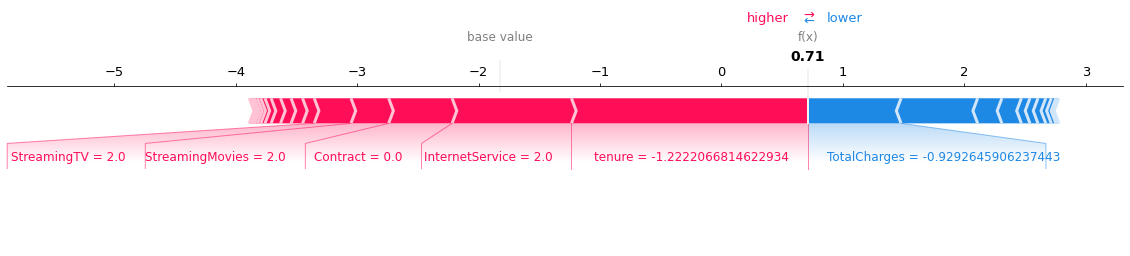

In [916]:
# Looking at Costumer No.89

print(X_test_transformed.iloc[89])
print(shap_values[89,:])
print('Predicted y:', y_pred[89])
print('True y: ', y_test.iloc[89])

shap.force_plot(explainer.expected_value,shap_values[89],X_test_transformed.iloc[89], show=False, matplotlib=True, figsize=(20,3))
plt.savefig(dirct +'/figures/Feature_Contribution_Customer89.png',dpi=300, bbox_inches = 'tight')

tenure                                    -1.262998
MonthlyCharges                            -0.632017
TotalCharges                              -0.983465
gender_Female                              0.000000
gender_Male                                1.000000
SeniorCitizen_0                            1.000000
SeniorCitizen_1                            0.000000
Partner_No                                 0.000000
Partner_Yes                                1.000000
Dependents_No                              0.000000
Dependents_Yes                             1.000000
PaperlessBilling_No                        0.000000
PaperlessBilling_Yes                       1.000000
PaymentMethod_Bank transfer (automatic)    0.000000
PaymentMethod_Credit card (automatic)      0.000000
PaymentMethod_Electronic check             0.000000
PaymentMethod_Mailed check                 1.000000
PhoneService                               1.000000
MultipleLines                              1.000000
InternetServ

<Figure size 432x288 with 0 Axes>

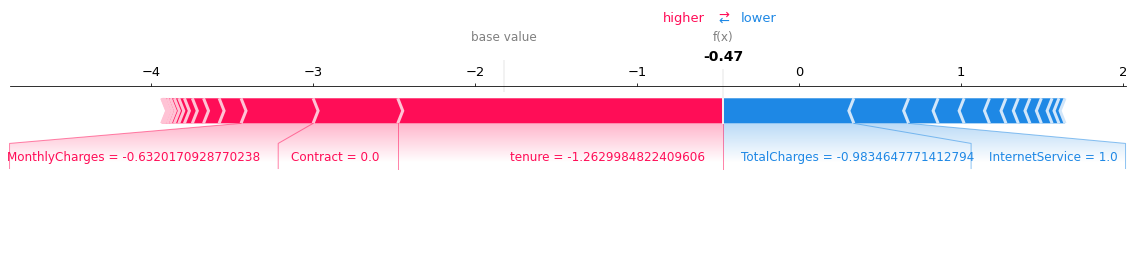

In [917]:
# Looking at Costumer No.33


print(X_test_transformed.iloc[33])
print(shap_values[33,:])
print('Predicted y:', y_pred[33])
print('True y: ', y_test.iloc[33])


fig = plt.gcf()
shap.force_plot(explainer.expected_value,shap_values[33],X_test_transformed.iloc[33], show=False, matplotlib=True,figsize=(20,3))
plt.savefig(dirct +'/figures/Feature_Contribution_Customer33.png',dpi=300,bbox_inches = 'tight')